<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Backpropagation Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Using TensorFlow Keras, Implement a 3 input, 4 node hidden-layer, 1 output node Multilayer Perceptron on the following dataset:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 0  | 0  | 1  | 0 |
| 0  | 1  | 1  | 1 |
| 1  | 0  | 1  | 1 |
| 0  | 1  | 0  | 1 |
| 1  | 0  | 0  | 1 |
| 1  | 1  | 1  | 0 |
| 0  | 0  | 0  | 0 |

If you look at the data you'll notice that the first two columns behave like an XOR gate while the last column is mostly just noise. Remember that creating an XOR gate was what the perceptron was criticized for not being able to learn.

This is your "Hello World!" of TensorFlow.

### Example TensorFlow Starter Code

```python 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(3, activation='sigmoid', input_dim=2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['acc'])

results = model.fit(X,y, epochs=100)

```

### Additional Written Tasks:
1. Investigate the various [loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses). Which is best suited for the task at hand (predicting 1 / 0) and why? 
 - i don't know the math to know what most of those loss functions are
 - the one given here, binary crossentropy, is best for this problem because it is used for categorical loss between true and false, which suits our problem
 - there is another, categorical crossentropy, which works for multiple categories, but is unnecessary here because we only have two categories
 - mean [absolute(? percentage)|squared(? logarithmic)] loss functions work for continous targets, not categorical
2. What is the difference between a loss function and a metric? Why might we need both in Keras? 
 - the loss function is what the model tries to optimize (minimize) while processing the data
 - the metric is how you judge the efficacy of the model
 - one reason for having both is to enable early stopping. if the model isn't improving in the desired metric, no need to keep running it
 - they can both be the same, or not.
 - some metrics cannot be directly optimized for
 - loss is used [in|by] the model, metric is used to judge the model
3. Investigate the various [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers). Stochastic Gradient Descent (`sgd`) is not the learning algorithm dejour anyone. Why is that? What do newer optimizers such as `adam` have to offer? 
 - optimzers determine how much/which direction to move based on the loss function
 - sgd can miss out on finding the optimal minimum because it applies the same learning rate to all parameters
 - this can make it overshoot, and have to work back again
 - also, sgd can get stuck in 'saddle-points' where it is at a local minimum because the gradient slopes up on each side.
 - other optimizers can adjust the learning rate per parameter and thus approach convergence without the flucuations of sgd
 - other optimizers make use of momentum to determine if they are approaching or about to go past an ideal minimum

In [52]:
import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
df = pd.DataFrame({
    'x1': [0, 0, 1, 0, 1, 1, 0],
    'x2': [0, 1, 0, 1, 0, 1, 0],
    'x3': [1, 1, 1, 0, 0, 1, 0],
    'y': [0, 1, 1, 1, 1, 0, 0,]
}).sample(n=1000, replace=True)

df

,x1,x2,x3,y
4,1,0,0,1
1,0,1,1,1
0,0,0,1,0
0,0,0,1,0
4,1,0,0,1
...,...,...,...,...
0,0,0,1,0
1,0,1,1,1
4,1,0,0,1
1,0,1,1,1


In [47]:
X = df[['x1', 'x2', 'x3']]
y = df['y']

In [48]:
epochs = 100

model = Sequential([
    Dense(4, activation='sigmoid', input_dim=3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['acc'])

results = model.fit(X, y, epochs=epochs, verbose=0)

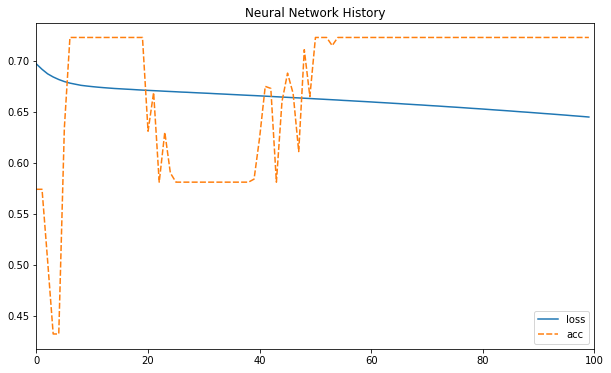

In [49]:
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=pd.DataFrame(results.history), ax=ax)
plt.title('Neural Network History')
plt.xlim(0, epochs)
plt.show()

### Build a Tensor Keras Perceptron

Try to match the architecture we used on Monday - inputs nodes and one output node. Apply this architecture to the XOR-ish dataset above. 

After fitting your model answer these questions: 

Are you able to achieve the same results as a bigger architecture from the first part of the assignment? Why is this disparity the case? What properties of the XOR dataset would cause this disparity? 

- yes, i get close to the same level of accuracy
- no disparity that i see
- no disparity

Now extrapolate this behavior on a much larger dataset in terms of features. What kind of architecture decisions could we make to avoid the problems the XOR dataset presents at scale? 

- i don't see any problems with this dataset based on the info above

*Note:* The bias term is baked in by default in the Dense layer.

In [51]:
epochs = 100

model = Sequential([
    Dense(1, activation='sigmoid', input_dim=3)
])

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['acc'])

results = model.fit(X, y, epochs=epochs, verbose=0)

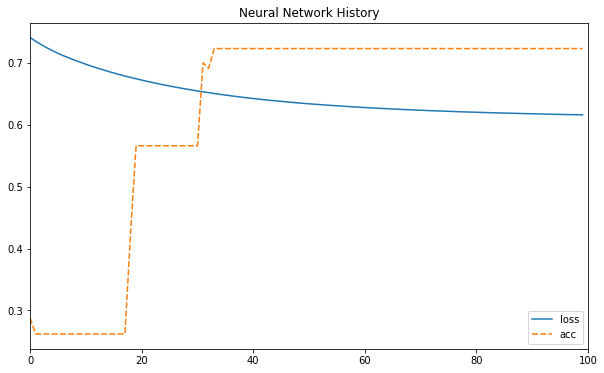

In [53]:
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=pd.DataFrame(results.history), ax=ax)
plt.title('Neural Network History')
plt.xlim(0, epochs)
plt.show()

## Try building/training a more complex MLP on a bigger dataset.

Use TensorFlow Keras & the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) to build the canonical handwriting digit recognizer and see what kind of accuracy you can achieve. 

If you need inspiration, the Internet is chalk-full of tutorials, but I want you to see how far you can get on your own first. I've linked to the original MNIST dataset above but it will probably be easier to download data through a neural network library. If you reference outside resources make sure you understand every line of code that you're using from other sources, and share with your fellow students helpful resources that you find.


### Parts
1. Gathering & Transforming the Data
2. Making MNIST a Binary Problem
3. Estimating your Neural Network (the part you focus on)

### Gathering the Data 

`keras` has a handy method to pull the mnist dataset for you. You'll notice that each observation is a 28x28 arrary which represents an image. Although most Neural Network frameworks can handle higher dimensional data, that is more overhead than necessary for us. We need to flatten the image to one long row which will be 784 values (28X28). Basically, you will be appending each row to one another to make on really long row. 

In [54]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [55]:
# input image dimensions
img_rows, img_cols = 28, 28

In [56]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [57]:
x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)

# Normalize Our Data
x_train = x_train / 255
x_test = x_test / 255

In [58]:
# Now the data should be in a format you're more familiar with
x_train.shape

(60000, 784)

### Making MNIST a Binary Problem 
MNIST is multiclass classification problem; however we haven't covered all the necessary techniques to handle this yet. You would need to one-hot encode the target, use a different loss metric, and use softmax activations for the last layer. This is all stuff we'll cover later this week, but let us simplify the problem for now: Zero or all else.

In [59]:
import numpy as np

y_temp = np.zeros(y_train.shape)
y_temp[np.where(y_train == 0.0)[0]] = 1
y_train = y_temp

y_temp = np.zeros(y_test.shape)
y_temp[np.where(y_test == 0.0)[0]] = 1
y_test = y_temp

In [60]:
# A Nice Binary target for ya to work with
y_train

array([0., 1., 0., ..., 0., 0., 0.])

### Estimating Your `net

In [79]:
epochs = 10

model = Sequential([
    Dense(4, activation='sigmoid', input_dim=784),
    Dense(8, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

results = model.fit(x_train, y_train, epochs=epochs, verbose=1, workers=6)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3396 - acc: 0.8553
Epoch 2/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0664 - acc: 0.9852
Epoch 3/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0303 - acc: 0.9923
Epoch 4/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0221 - acc: 0.9935
Epoch 5/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0181 - acc: 0.9949
Epoch 6/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0156 - acc: 0.9956
Epoch 7/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0140 - acc: 0.9960
Epoch 8/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0125 - acc: 0.9963
Epoch 9/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0112 - acc: 0.9966
Epoch 10/10
60000/60000 [==============================] - 

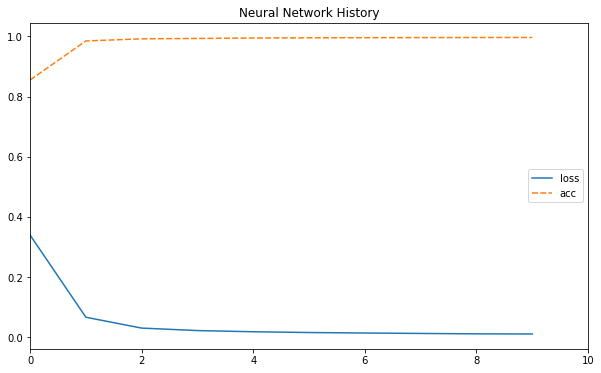

In [80]:
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=pd.DataFrame(results.history), ax=ax)
plt.title('Neural Network History')
plt.xlim(0, epochs)
plt.show()

In [81]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test)

score = accuracy_score(y_test, np.round(y_pred))

print(f'test accuracy: {score * 100:.2f}')

test accuracy: 99.54


## Stretch Goals: 

- Make MNIST a multiclass problem using cross entropy & soft-max
- Implement Cross Validation model evaluation on your MNIST implementation 
- Research different [Gradient Descent Based Optimizers](https://keras.io/optimizers/)
 - [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)
- Build a housing price estimation model using a neural network. How does its accuracy compare with the regression models that we fit earlier on in class?